In [1]:
from sklearn import datasets

# How are we going to use evaluate the performance? 
# 1. accuracy
from sklearn import metrics
# 2. f1 score 
from sklearn.metrics import f1_score

# Machine learning models 

# Linear Regression 
# url : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# SVM
# url: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

# KNN 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
# url: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# Random Forest 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Logistic Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# PCA 
from sklearn.decomposition import PCA 

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report

# Preprocessing

In [2]:
# Total

In [3]:
total_dep_score = pd.read_csv('../data/0&1/sum_targets_with_panic.csv')

X_t = total_dep_score.copy()
del X_t['dep_score']
del X_t['dep_thoughts']
del X_t['has_dep_diag']
del X_t['prim_diag']
del X_t['secd_diag']
del X_t['panic_score']
del X_t['total']


y_t = total_dep_score['total']
y_t.value_counts() 

1.0    523
2.0    287
5.0    189
3.0    149
4.0     68
6.0     38
Name: total, dtype: int64

In [6]:
X_t

,comp_week,comp_wend,text_week,text_wend,tv_week,tv_wend
0,1,2,1,1,1,2
1,2,2,3,3,1,2
2,1,0,1,2,1,1
3,2,3,3,3,2,3
4,2,3,1,1,2,1
...,...,...,...,...,...,...
1249,2,2,2,2,2,1
1250,3,3,1,1,1,2
1251,3,0,2,2,2,2
1252,2,3,1,1,1,2


In [7]:
y_t

0       1.0
1       3.0
2       5.0
3       4.0
4       2.0
       ... 
1249    1.0
1250    1.0
1251    1.0
1252    1.0
1253    5.0
Name: total, Length: 1254, dtype: float64

# Sampled 

In [8]:
sampled_dep_score = pd.read_csv('../data/0&1/sampled_sum_targets_with_panic.csv')

X_s = sampled_dep_score.copy()
del X_s['dep_score']
del X_s['dep_thoughts']
del X_s['has_dep_diag']
del X_s['prim_diag']
del X_s['secd_diag']
del X_s['panic_score']
del X_s['total']

y_s = sampled_dep_score['total']
y_s.value_counts() 

4.0    38
5.0    38
1.0    38
6.0    38
2.0    38
3.0    38
Name: total, dtype: int64

In [9]:
X_s

,comp_week,comp_wend,text_week,text_wend,tv_week,tv_wend
0,3,3,2,3,1,2
1,2,3,2,2,3,2
2,2,2,0,0,3,3
3,3,3,3,3,3,3
4,3,3,0,0,3,3
...,...,...,...,...,...,...
223,1,1,1,2,2,2
224,3,2,3,3,2,3
225,2,3,1,1,2,2
226,2,3,3,3,2,3


In [10]:
y_s

0      3.0
1      3.0
2      2.0
3      6.0
4      2.0
      ... 
223    2.0
224    1.0
225    5.0
226    6.0
227    4.0
Name: total, Length: 228, dtype: float64

In [11]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 1)

# 1. total

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.3, random_state=1)  # 70% training and 30% test

## SVM

In [13]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC(random_state=1)

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=2)      

In [14]:
# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 130 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:   16.7s finished


best hyper parameters {'C': 1.0, 'gamma': 0.1, 'kernel': 'poly'}


In [15]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Accuracy: 0.44297082228116713
F1 score micro: 0.44297082228116713

classification report:
               precision    recall  f1-score   support

         1.0       0.44      1.00      0.61       167
         2.0       0.00      0.00      0.00        84
         3.0       0.00      0.00      0.00        36
         4.0       0.00      0.00      0.00        19
         5.0       0.00      0.00      0.00        60
         6.0       0.00      0.00      0.00        11

    accuracy                           0.44       377
   macro avg       0.07      0.17      0.10       377
weighted avg       0.20      0.44      0.27       377



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    3.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.3s finished


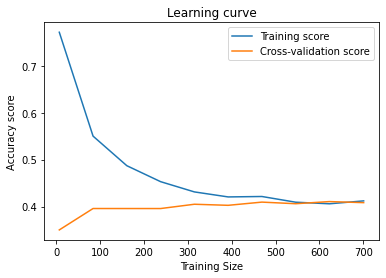

In [16]:
# 여기만 바꾸면 된다. 
plot_model = svm.SVC(kernel='poly', C=1.0, gamma=0.1)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Logistic Regression

In [17]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression(random_state=1)

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [18]:
# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:   14.1s


best hyper parameters {'C': 0.1, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}


[Parallel(n_jobs=-1)]: Done 2093 out of 2100 | elapsed:   17.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:   17.2s finished


In [19]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Accuracy: 0.44297082228116713
F1 score micro: 0.44297082228116713

classification report:
               precision    recall  f1-score   support

         1.0       0.44      1.00      0.61       167
         2.0       0.00      0.00      0.00        84
         3.0       0.00      0.00      0.00        36
         4.0       0.00      0.00      0.00        19
         5.0       0.00      0.00      0.00        60
         6.0       0.00      0.00      0.00        11

    accuracy                           0.44       377
   macro avg       0.07      0.17      0.10       377
weighted avg       0.20      0.44      0.27       377



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished


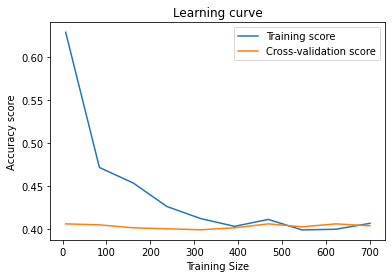

In [20]:
# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=0.1, multi_class='auto', penalty='l2', solver='newton-cg')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## KNN

In [21]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=len(y_t.unique()))

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [22]:
# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.1s


best hyper parameters {'algorithm': 'brute', 'leaf_size': 2, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    6.4s finished


In [23]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Accuracy: 0.32891246684350134
F1 score micro: 0.32891246684350134

classification report:
               precision    recall  f1-score   support

         1.0       0.40      0.65      0.50       167
         2.0       0.20      0.13      0.16        84
         3.0       0.03      0.03      0.03        36
         4.0       0.00      0.00      0.00        19
         5.0       0.18      0.07      0.10        60
         6.0       0.00      0.00      0.00        11

    accuracy                           0.33       377
   macro avg       0.14      0.15      0.13       377
weighted avg       0.25      0.33      0.27       377



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.3s finished


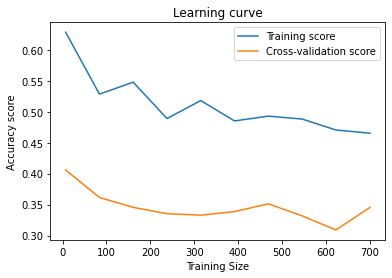

In [24]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='brute', leaf_size=2, weights='uniform')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

## Random Forest

In [26]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier(random_state=1)

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [27]:
# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3946 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 5160 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 6538 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 8076 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 9778 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 11640 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 13666 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 15852 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 18202 tasks   

best hyper parameters {'bootstrap': True, 'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 50, 'n_estimators': 50}


In [28]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Accuracy: 0.44297082228116713
F1 score micro: 0.44297082228116713

classification report:
               precision    recall  f1-score   support

         1.0       0.44      0.99      0.61       167
         2.0       0.50      0.02      0.05        84
         3.0       0.00      0.00      0.00        36
         4.0       0.00      0.00      0.00        19
         5.0       0.00      0.00      0.00        60
         6.0       0.00      0.00      0.00        11

    accuracy                           0.44       377
   macro avg       0.16      0.17      0.11       377
weighted avg       0.31      0.44      0.28       377



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    3.6s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.6s finished


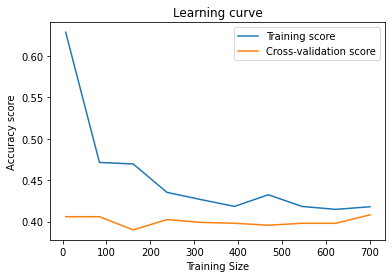

In [29]:
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=14, max_features='auto', min_samples_leaf=2, min_samples_split=50, n_estimators=50)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

In [30]:
# Total Learning Curve

[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [  7  84 161 238 315 392 469 546 623 701]


[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.5s finished


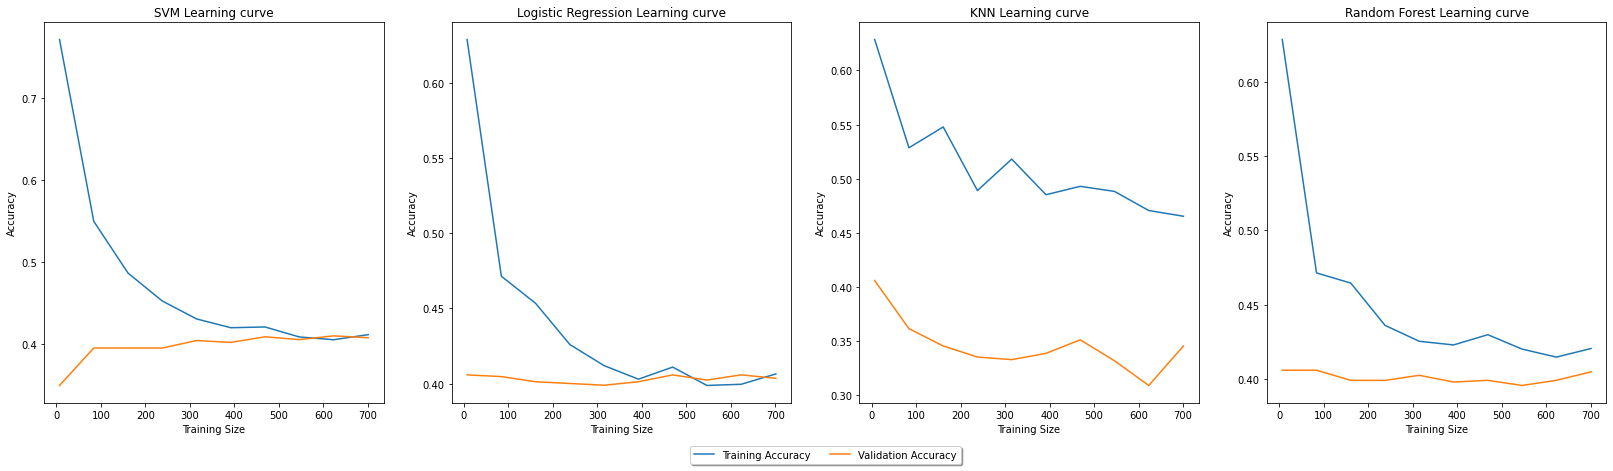

In [31]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(28, 7))

# SVM
plot_model = svm.SVC(kernel='poly', C=1.0, gamma=0.1)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax1.plot(train_sizes, train_mean, label='Training Accuracy')
ax1.plot(train_sizes, val_mean, label='Validation Accuracy')
ax1.set_title('SVM Learning curve')
ax1.set_xlabel('Training Size')
ax1.set_ylabel('Accuracy')

# Logistic Regression
plot_model = LogisticRegression(C=0.1, multi_class='auto', penalty='l2', solver='newton-cg')

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax2.plot(train_sizes, train_mean, label='Training Accuracy')
ax2.plot(train_sizes, val_mean, label='Validation Accuracy')
ax2.set_title('Logistic Regression Learning curve')
ax2.set_xlabel('Training Size')
ax2.set_ylabel('Accuracy')


# KNN
plot_model = KNeighborsClassifier(algorithm='brute', leaf_size=2, weights='uniform')

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax3.plot(train_sizes, train_mean, label='Training Accuracy')
ax3.plot(train_sizes, val_mean, label='Validation Accuracy')
ax3.set_title('KNN Learning curve')
ax3.set_xlabel('Training Size')
ax3.set_ylabel('Accuracy')

# Random Forest
plot_model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=14, max_features='auto', min_samples_leaf=2, min_samples_split=50, n_estimators=50)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax4.plot(train_sizes, train_mean, label='Training Accuracy')
ax4.plot(train_sizes, val_mean, label='Validation Accuracy')
ax4.set_title('Random Forest Learning curve')
ax4.set_xlabel('Training Size')
ax4.set_ylabel('Accuracy')
ax4.legend(loc='upper center', bbox_to_anchor=(-1.3, -0.1),
          fancybox=True, shadow=True, ncol=2)

# 2. sampled

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=1)  # 70% training and 30% test

# SVM 

In [33]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-4, -1, 4),
                        'C': np.logspace(-3, 1, 5),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC(random_state=1)

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=2)      

In [34]:
# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 186 tasks      | elapsed:    2.7s


best hyper parameters {'C': 10.0, 'gamma': 0.1, 'kernel': 'sigmoid'}


[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    4.2s finished


In [35]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, svm_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, svm_y_pred))

Accuracy: 0.2028985507246377
F1 score micro: 0.2028985507246377

classification report:
               precision    recall  f1-score   support

         1.0       0.23      0.46      0.31        13
         2.0       0.25      0.11      0.15         9
         3.0       0.00      0.00      0.00        12
         4.0       0.00      0.00      0.00        14
         5.0       0.18      0.70      0.29        10
         6.0       0.00      0.00      0.00        11

    accuracy                           0.20        69
   macro avg       0.11      0.21      0.12        69
weighted avg       0.10      0.20      0.12        69



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[learning_curve] Training set sizes: [  1  15  29  43  57  71  85  99 113 127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    2.3s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.5s finished


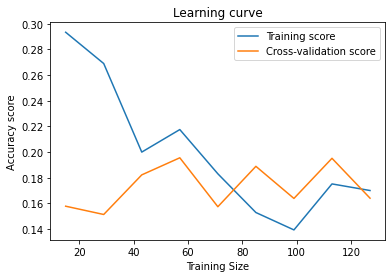

In [36]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = svm.SVC(kernel='sigmoid', C=10.0, gamma=0.1)


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# Logistic Regression

In [41]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-4, 2, 7),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression(random_state=1)

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [42]:
# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.8s


best hyper parameters {'C': 1.0, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}


[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:   11.2s finished


In [43]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, log_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, log_y_pred))

Accuracy: 0.2753623188405797
F1 score micro: 0.2753623188405797

classification report:
               precision    recall  f1-score   support

         1.0       0.67      0.15      0.25        13
         2.0       0.30      0.67      0.41         9
         3.0       0.22      0.17      0.19        12
         4.0       0.00      0.00      0.00        14
         5.0       0.17      0.40      0.24        10
         6.0       0.42      0.45      0.43        11

    accuracy                           0.28        69
   macro avg       0.30      0.31      0.25        69
weighted avg       0.29      0.28      0.24        69



[learning_curve] Training set sizes: [  1  15  29  43  57  71  85  99 113 127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.5s finished


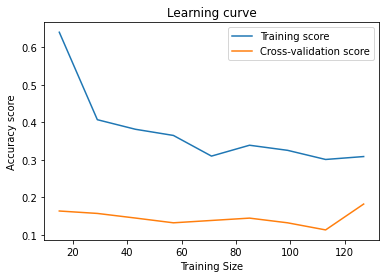

In [44]:
# ------ HERE ------

# 여기만 바꾸면 된다. 
plot_model = LogisticRegression(C=1.0, multi_class='auto', penalty='l1', solver='saga')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# KNN

In [45]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=len(y_t.unique()))

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [46]:
# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    0.8s


best hyper parameters {'algorithm': 'auto', 'leaf_size': 34, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.5s finished


In [47]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, knn_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, knn_y_pred))

Accuracy: 0.18840579710144928
F1 score micro: 0.18840579710144928

classification report:
               precision    recall  f1-score   support

         1.0       0.21      0.31      0.25        13
         2.0       0.13      0.22      0.17         9
         3.0       0.00      0.00      0.00        12
         4.0       0.29      0.14      0.19        14
         5.0       0.15      0.20      0.17        10
         6.0       0.27      0.27      0.27        11

    accuracy                           0.19        69
   macro avg       0.18      0.19      0.18        69
weighted avg       0.18      0.19      0.18        69



[learning_curve] Training set sizes: [ 12  25  38  50  63  76  88 101 114 127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    1.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.8s finished


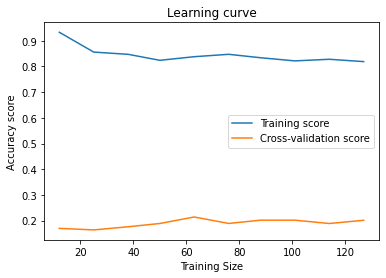

In [49]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=34, weights='distance')


train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.1, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# Random Forest

In [50]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier(random_state=1)

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [51]:
# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

Fitting 5 folds for each of 7500 candidates, totalling 37500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 2002 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3946 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 5160 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 6538 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 8076 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 9778 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 11640 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 13666 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 15852 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 18202 tasks   

best hyper parameters {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 26, 'n_estimators': 16}


[Parallel(n_jobs=-1)]: Done 37500 out of 37500 | elapsed: 14.9min finished


In [52]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score micro:", f1_score(y_test, rf_y_pred, average='micro'))

print("\nclassification report:\n", classification_report(y_test, rf_y_pred))

Accuracy: 0.2028985507246377
F1 score micro: 0.2028985507246377

classification report:
               precision    recall  f1-score   support

         1.0       0.25      0.08      0.12        13
         2.0       0.25      0.44      0.32         9
         3.0       0.19      0.25      0.21        12
         4.0       0.29      0.14      0.19        14
         5.0       0.09      0.20      0.13        10
         6.0       0.50      0.18      0.27        11

    accuracy                           0.20        69
   macro avg       0.26      0.22      0.21        69
weighted avg       0.26      0.20      0.20        69



[learning_curve] Training set sizes: [  1  15  29  43  57  71  85  99 113 127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished


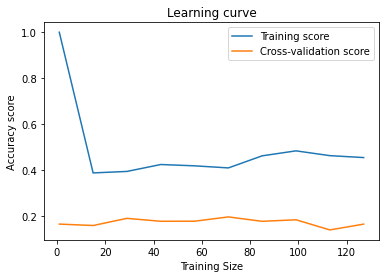

In [54]:
# ------ HERE ------

# plug in suitable hyper-parameters


# 여기만 바꾸면 된다. 
plot_model = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=14, max_features='auto', min_samples_leaf=2, min_samples_split=26, n_estimators=16)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)
# 여기만 바꾸면 된다. 


train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Cross-validation score')
plt.title('Learning curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy score')
plt.legend(loc='best')
plt.show()

# Sampled Learning Curve

[learning_curve] Training set sizes: [  1  15  29  43  57  71  85  99 113 127]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    2.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [  1  15  29  43  57  71  85  99 113 127]


[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [ 12  25  38  50  63  76  88 101 114 127]


[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [  1  15  29  43  57  71  85  99 113 127]


[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    0.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished


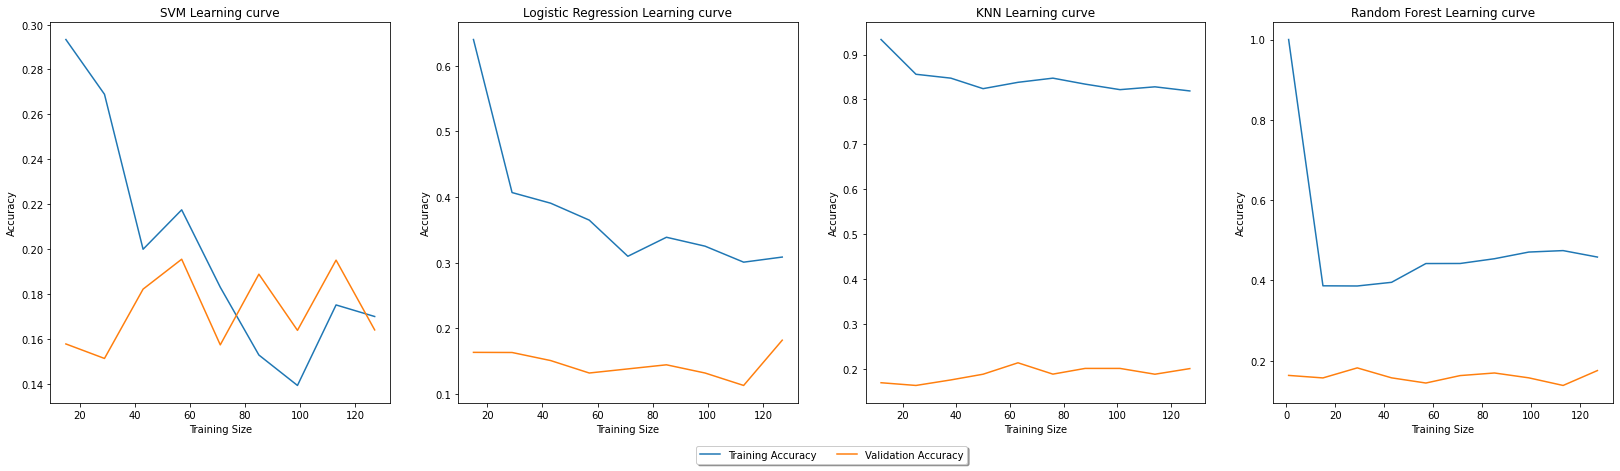

In [56]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(28, 7))

# SVM
plot_model = svm.SVC(kernel='sigmoid', C=10.0, gamma=0.1)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax1.plot(train_sizes, train_mean, label='Training Accuracy')
ax1.plot(train_sizes, val_mean, label='Validation Accuracy')
ax1.set_title('SVM Learning curve')
ax1.set_xlabel('Training Size')
ax1.set_ylabel('Accuracy')

# Logistic Regression
plot_model = LogisticRegression(C=1.0, multi_class='auto', penalty='l1', solver='saga')

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax2.plot(train_sizes, train_mean, label='Training Accuracy')
ax2.plot(train_sizes, val_mean, label='Validation Accuracy')
ax2.set_title('Logistic Regression Learning curve')
ax2.set_xlabel('Training Size')
ax2.set_ylabel('Accuracy')


# KNN
plot_model = KNeighborsClassifier(algorithm='auto', leaf_size=34, weights='distance')

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.1, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax3.plot(train_sizes, train_mean, label='Training Accuracy')
ax3.plot(train_sizes, val_mean, label='Validation Accuracy')
ax3.set_title('KNN Learning curve')
ax3.set_xlabel('Training Size')
ax3.set_ylabel('Accuracy')

# Random Forest
plot_model = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=14, max_features='auto', min_samples_leaf=2, min_samples_split=26, n_estimators=16)

train_sizes, train_scores, val_scores = learning_curve(plot_model, 
                                                       X_train, 
                                                       y_train, 
                                                       cv=5, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1, # 이거 바꾸고 싶으면 바꾸고  
                                                       train_sizes=np.linspace(0.01, 1, 10), 
                                                       verbose=2)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

ax4.plot(train_sizes, train_mean, label='Training Accuracy')
ax4.plot(train_sizes, val_mean, label='Validation Accuracy')
ax4.set_title('Random Forest Learning curve')
ax4.set_xlabel('Training Size')
ax4.set_ylabel('Accuracy')
ax4.legend(loc='upper center', bbox_to_anchor=(-1.3, -0.1),
          fancybox=True, shadow=True, ncol=2)